# Clasificación de margen máximo con máquinas de vectores de soporte #
Otro algoritmo de aprendizaje potente y ampliamente utilizado es la **máquina de vectores de soporte (SVM)**, que puede considerarse una extensión del perceptrón. Al utilizar el algoritmo perceptron, se minimizan los errores de clasificación errónea. Sin embargo, en SVM el objetivo de optimización es maximizar el margen. El **margen** se define como la distancia entre el hiperplano de separación (límite de decisión) y los ejemplos de entrenamiento más cercanos a este hiperplano, que son los llamados **vectores de soporte**.

![Margenes maximizados](imgs/maxmargin.png)

### Intuición sobre el margen máximo ###
La razón detras de tener límites de decisión con márgenes grandes es que tienden a tener menores errores de generalización, mientras que los modelos con márgenes pequeños son más propensos al sobreajuste. Para tener una idea sobre la maximización de margenes, nos vamos a centrar esos hiperplanos positivo y negativo paralelos a el límite de decisión, que se pueden expresar como:

$$\begin{equation*} w_0 + \mathbf{w}^T\mathbf{x}_{pos}=1\end{equation*}$$
$$\begin{equation*} w_0 + \mathbf{w}^T\mathbf{x}_{neg}=-1\end{equation*}$$

Si restamos estas dos ecuaciones, se tiene:

$$\Rightarrow \mathbf{w}^T \big(\mathbf{x}_{pos} - \mathbf{x}_{new} \big) = 2 $$

Se pude normalizar la ecuación mediante la norma o longitud del vector $w$, que se define como:

$$ \begin{Vmatrix}\mathbf{w}\end{Vmatrix} = \sqrt{\sum_{j=1}^m w_j^2}$$

Así se llega a la siguiente equación:

$$\begin{equation*}\frac{ \mathbf{w}^T \big(\mathbf{x}_{pos} - \mathbf{x}_{neg} \big)}{\begin{Vmatrix}\mathbf{w}\end{Vmatrix}} = \frac{2}{\begin{Vmatrix}\mathbf{w}\end{Vmatrix}} \end{equation*}$$

La exprsión de la izquierda se puede interpretar como la distancia entre el hiperploano positivo y negativo, que es lo que se denomina **margen** y se quiere maximizar.

Ahora, la función objetivo de la SVM se convierte en la maximización de este margen maximizando $\frac{2}{\begin{Vmatrix}\mathbf{w}\end{Vmatrix}}$ bajo la restrición de que los ejemplos se han clasificado correctamente, que se puede escribir como:

$$\begin{equation*}w_0 + \mathbf{w}^T\mathbf{x}^{(i)} \geq 1\,\, si y^{(i)}=1 \end{equation*}$$

$$\begin{equation*}w_0 + \mathbf{w}^T\mathbf{x}^{(i)} \leq -1\,\, si y^{(i)}=-1\end{equation*}$$

$$ para\,i = 1...N$$

Donde $N$ es el número de ejemplos en el conjunto de datos.

Estas dos ecuaciones básicamente dicen que todos los ejemplos de clase negativa deben caer en el lado negativo del hiperplano negativo, mientras que los ejemplos de clase positiva caeran en el lado positivo del hiperplano positivo, lo cual se puede escribri de forma más compacta como sigue:

$$\begin{equation}y^{(i)}\big(w_0 + \mathbf{w}^T\mathbf{x}^{(i)}\big) \geq 1\,\, \forall i\end{equation}$$

En la práctica es más sencillo minimizar el termino reciproco, $\frac{1}{2}\begin{Vmatrix}\mathbf{w}\end{Vmatrix}^2$, que se puede resolver mediante programación cuadrática

### Manejo de un caso separable no lineal utilizando variables de holgura ###
Se mencionara brevemente la variable de holgura, $\xi$, que introdujo Vladimir Vapnik en 1995 y condujo a la denominada **clasificación de margen blando**. La motivación para introducir la variable de holgura fue que las restricciones lineales necesitan ser relajadas para datos separables no linealmente para permitir la convergencia de la optimización en presencia de clasificaciones erróneas, bajo penalización de coste apropiada.

La variable de holgura de valor positivo simplemente se agrega a las restricciones lineales:

$$\begin{equation*}w_0 + \mathbf{w}^T\mathbf{x}^{(i)} \geq 1 - \xi\,\, si y^{(i)}=1 \end{equation*}$$

$$\begin{equation*}w_0 + \mathbf{w}^T\mathbf{x}^{(i)} \leq -1 + \xi\,\, si y^{(i)}=-1\end{equation*}$$

$$ para\,i = 1...N$$

Aquí, N es el número de ejemplos en nuestro conjunto de datos. Así, el nuevo objetivo a minimizar (sujeto a las restricciones) se convierte en:

$$\begin{equation*}\frac{1}{2}\begin{Vmatrix}\mathbf{w}\end{Vmatrix}^2 + C\bigg(\sum_{i}\xi^{(i)}\bigg) \end{equation*}$$

A través de la variable, `C` podemos controlar la penalización por clasificación errónea. Valores grandes de `C` corresponden a penalizaciones por errores grandes, mientras que se es menos estrictos con respecto a los errores de clasificación errónea si se elegen valores más pequeños para `C`. Por lo tanto, se puede usar el parámetro `Cp` para controlar el ancho del margen y, por lo tanto, ajustar el equilibrio de sesgo-varianza, como se ve en la siguiente figura:

![Margenes maximizados](imgs/variablesolgura.png)

Este concepto está relacionado con la regularización, donde la disminución del valor de `C` aumenta el sesgo y disminuye la varianza del modelo.

### Entrenamiento de un modelo SVM ###

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import train_test_split
from decisionregion import plot_decision_regions
from sklearn.preprocessing import StandardScaler

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [3]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

<IPython.core.display.Javascript object>


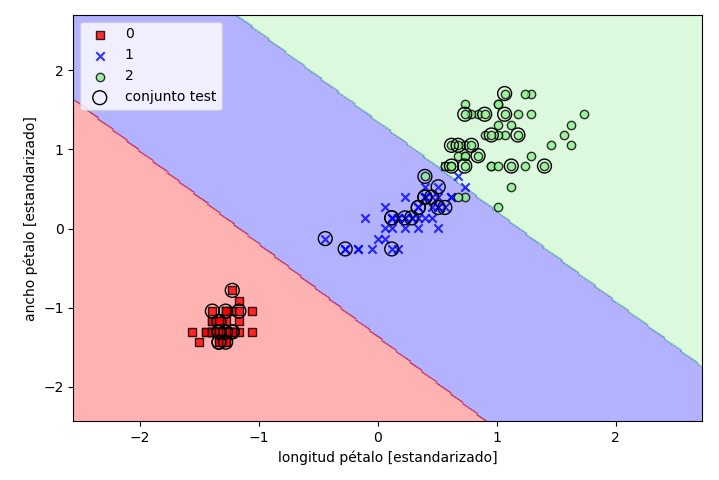

In [4]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105,150))
plt.xlabel('longitud pétalo [estandarizado]')
plt.ylabel('ancho pétalo [estandarizado]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

> ##### Regresión logística versus SVMs #####
> En tareas prácticas de clasificación, la regresión logística lineal y las SVM lineales a menudo arrojan resultados muy parecidos. La regresión logística intenta maximizar las probabilidades condicionales de los datos de entrenamiento, lo que lo hace más propenso a los valores atípicos que los SVM, que en su mayoría se preocupan por los puntos más cercanos al límite de decisión (vectores de soporte). Por otro lado, la regresión logística tiene la ventaja de que es un modelo más simple y puede implementarse más fácilmente. Además, los modelos de regresión logística se pueden actualizar fácilmente, lo cual es atractivo cuando se trabaja con flujos de datos.

### Implementaciones alternativas en scikit-learn ###
La clase `LogisticRegression` de la biblioteca scikit-learn utiliza la biblioteca LIBLINEAR, que es una biblioteca C/C++ altamente optimizada desarrollada en la Universidad Nacional de Taiwán.

Del mismo modo, la clase `SVC` que utilizamos para entrenar un SVM hace uso de LIBSVM, que es una biblioteca C/C++ equivalente especializada para SVM.

La ventaja de usar LIBLINEAR y LIBSVM sobre las implementaciones nativas de Python es que permiten el entrenamiento extremadamente rápido de grandes cantidades de clasificadores lineales. Sin embargo, a veces nuestros conjuntos de datos son demasiado grandes para caber en la memoria de la computadora. Por ello, scikit-learn también ofrece implementaciones alternativas a través de la clase `SGDClassifier`, que también admite el aprendizaje en línea a través del método `partial_fit`. El concepto detrás de la clase `SGDClassifier` es similar al algoritmo del gradiente descendente estocástico. Se puede inicializar la versión SGD del perceptrón, la regresión logística y un SVM con parámetros predeterminados, de la siguiente manera:

In [5]:
from sklearn.linear_model import SGDClassifier
pnn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

### Resolución de problemas no lineales usando un kernel SVM ###